![example](images/camera-filming-banner2.jpg)

# A Movie Analysis for Microsoft

**Authors:** Sameeha Ramadhan

## Overview

This analysis attempts to satisfy the informational needs of Microsoft (MSFT) to determine which types of films their new studio should produce. Descriptive analysis of popular genres and ratings data show that while the preferred movie types that some people enjoy varies seasonally (think: horror films around Halloween and Christmas movies during the Christmas season), overall the three types of films that are currently doing the best are: . Microsoft can use this analysis to adjust planning, production, and marketing to hit the ground running as they enter this highly competitve space.


 # Business Problem
 ![example](images/data-film.jpg)

Microsoft may be able to enter the movie making sector and successfully stand out from fierce competition by choosing to create films that their target audiences have shown to thoroughly enjoy. Doing so will allow them to produce movies that will instantly become hits, which will in turn allow them to improve on and produce even more content, setting them up to be a studio force to be reckoned with. Using data from well-known industry sources such as Imdb, I analyze and explain patterns in popular movie types based on ratings and reviews, as well as budgeting decisions to help predict what audiences want from a film and thus guaranteeing its success.



***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?


## Data Understanding

Rotten Tomatoes is a well-known review-aggregation website for television and film. Due to its frequent use by the American public, it is widely viewed as the 'go-to' in deciding whether or not a production is worth watching. IMDB.com is a database that is considered the most authoritative source for all film and television related material. The data from both websites provide information such as, but not limited to, reviews and ratings.


***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***



## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


%matplotlib inline

In [235]:
#File names for my reference

variables = ['imdb_tr', 'imdb_nb', 'imdb_ta', 'imdb_tc', 'imdb_tp', 'imdb_tb', 'tmdb_mv',
             'bom_mg', 'tn_mb', 'rt_cr', 'rt_mv']
defs = ['imdb title ratings', 'imdb name basics', 'title akas', 'title crew', 'title principals',
        'title basics', 'tmdb_movies', 'bom movie gross', 'tn movie budgets',
        'rotten tomatoes critic reviews', 'rotten tomatoes movies']
a = {'Variable':variables,'Definition':defs}
file_names = pd.DataFrame(a, columns=['Variable', 'Definition'])
file_names


,Variable,Definition
0,imdb_tr,imdb title ratings
1,imdb_nb,imdb name basics
2,imdb_ta,title akas
3,imdb_tc,title crew
4,imdb_tp,title principals
5,imdb_tb,title basics
6,tmdb_mv,tmdb_movies
7,bom_mg,bom movie gross
8,tn_mb,tn movie budgets
9,rt_cr,rotten tomatoes critic reviews


In [57]:
# Here you run your code to explore the data
imdb_tr = pd.read_csv('./data/imdb.title.ratings.csv.gz')
imdb_tr.head(10)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


In [253]:
unique_id = imdb_ta.drop_duplicates(subset=['title_id'])
unique_id[unique_id['is_original_title'] == 1]

,title_id,ordering,title,region,language,types,attributes,is_original_title
83,tt10010134,1,Versailles Rediscovered - The Sun King's Vanis...,NaN,NaN,original,NaN,1.0
86,tt10027708,1,Miguelito - Canto a Borinquen,NaN,NaN,original,NaN,1.0
90,tt10050722,1,Thing I Don't Get,NaN,NaN,original,NaN,1.0
93,tt10121294,1,This Jelly Doughnut Feeling,NaN,NaN,original,NaN,1.0
137,tt10214198,1,Gou yan kan ren xin,NaN,NaN,original,NaN,1.0
...,...,...,...,...,...,...,...,...
331623,tt9159000,1,Mate,NaN,NaN,original,NaN,1.0
331653,tt9358044,1,Hail Satan?,NaN,NaN,original,NaN,1.0
331656,tt9358256,1,Shooting the Mafia,NaN,NaN,original,NaN,1.0
331667,tt9515312,1,Ihmemaa,NaN,NaN,original,NaN,1.0


In [210]:
imdb_ta = pd.read_csv('./data/imdb.title.akas.csv.gz')
imdb_ta.head(10)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0
5,tt0369610,15,Jurassic World,GR,NaN,imdbDisplay,NaN,0.0
6,tt0369610,16,Jurassic World,IT,NaN,imdbDisplay,NaN,0.0
7,tt0369610,17,Jurski svijet,HR,NaN,imdbDisplay,NaN,0.0
8,tt0369610,18,Olam ha'Yura,IL,he,imdbDisplay,NaN,0.0
9,tt0369610,19,Jurassic World: Mundo Jurásico,MX,NaN,imdbDisplay,NaN,0.0


In [53]:
duplicates = imdb_ta[imdb_ta.duplicated(subset='title')]
print(len(duplicates))
duplicates.head()

78922


,title_id,ordering,title,region,language,types,attributes,is_original_title
5,tt0369610,15,Jurassic World,GR,NaN,imdbDisplay,NaN,0.0
6,tt0369610,16,Jurassic World,IT,NaN,imdbDisplay,NaN,0.0
11,tt0369610,20,Jurassic World,SE,NaN,imdbDisplay,NaN,0.0
13,tt0369610,22,Jurassic World 3D,DE,NaN,NaN,3-D version,0.0
14,tt0369610,23,Jurassic World 3D,XWW,NaN,NaN,3-D version,0.0


In [113]:
imdb_ta['language'].isna().sum()

289988

In [115]:
len(imdb_ta['language'])

331703

In [125]:
non_null = len(imdb_ta['language']) - imdb_ta['language'].isna().sum()
non_null

41715

In [127]:
len(imdb_ta)

331703

In [111]:
originaltitles = imdb_ta[imdb_ta['is_original_title'] == 1.0 ]
len(originaltitles)

44700

In [256]:
len(death_nb)

6783

In [159]:
imdb_nb = pd.read_csv('./data/imdb.name.basics.csv.gz')
print(len(imdb_nb) - len(death_nb))
imdb_nb.head(10)

599865


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
5,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445"
6,nm0063198,Bayou,NaN,NaN,actor,"tt6579724,tt0093116"
7,nm0063432,Stevie Be-Zet,NaN,NaN,"composer,soundtrack","tt3106212,tt0478239,tt0264917,tt1626606"
8,nm0063618,Jeff Beal,1963.0,NaN,"composer,music_department,soundtrack","tt0183659,tt2545118,tt0384766,tt1856010"
9,nm0063750,Lindsay Beamish,NaN,NaN,"actress,miscellaneous","tt0404826,tt0111756,tt0367027,tt1492842"


In [172]:
imdb_nb['known_for_titles']

0         tt0837562,tt2398241,tt0844471,tt0118553
1         tt0896534,tt6791238,tt0287072,tt1682940
2         tt1470654,tt0363631,tt0104030,tt0102898
3         tt0114371,tt2004304,tt1618448,tt1224387
4         tt0452644,tt0452692,tt3458030,tt2178256
                           ...                   
606643                                        NaN
606644                        tt9090932,tt8737130
606645                        tt8734436,tt9615610
606646                                        NaN
606647                                  tt8743182
Name: known_for_titles, Length: 606648, dtype: object

In [191]:
newnb = imdb_nb[imdb_nb.birth_year.notnull()]
len(newnb)

82736

In [257]:
len(production_team)

159142

In [225]:
#Filtered out the production team after converting the column to a string by slicing the strings based on profession.
#Here it is 'produc' to include 'producer', 'production_manager', 'production_designer'
production_team = imdb_nb[imdb_nb['primary_profession'].str.contains('produc')]
production_team.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
5,nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445"
10,nm0064023,Bryan Beasley,NaN,NaN,"director,producer,writer","tt3501180,tt1485100,tt1358897,tt1387162"
11,nm0064350,Martine Beauchemin,NaN,NaN,"producer,production_manager","tt5479010,tt0316463,tt1286159,tt0380732"


In [233]:
production_team.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159142 entries, 0 to 606646
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              159142 non-null  object 
 1   primary_name        159142 non-null  object 
 2   birth_year          24524 non-null   float64
 3   primary_profession  159142 non-null  object 
 4   known_for_titles    155746 non-null  object 
dtypes: float64(1), object(4)
memory usage: 12.3+ MB


In [ ]:
#After reviewing the data, I determined the column 'death year' had about 90% null values, so I decided to delete it all
#together. Leaving it provided no value and attempting to fill it with a mean or median could easily provide
#highly false figures.
production_team.drop(['death_year'], axis =1, inplace=True)

In [186]:
#Converted the primary_profession column to a string in order to slice.
imdb_nb['primary_profession'] = imdb_nb['primary_profession'].astype('str')

In [188]:
producers = imdb_nb[imdb_nb.apply(lambda x: x["primary_profession"] == 'producer', axis=1)]
producers

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
69,nm0086850,G. Robert Blakey,1936.0,NaN,producer,"tt0094574,tt0206501,tt9412600,tt2281529"
131,nm0106842,Neil Bregman,1954.0,NaN,producer,"tt0410055,tt0816539,tt0283805,tt0357585"
425,nm0280915,Gerry Flahive,NaN,NaN,producer,"tt0118858,tt0214822,tt3304616,tt0206501"
569,nm0411666,Sandra Itkoff,NaN,NaN,producer,"tt1083853,tt0497398,tt1377278,tt0795174"
883,nm0667045,Martin Paul-Hus,NaN,NaN,producer,"tt0238994,tt0484881,tt2071465,tt0402378"
...,...,...,...,...,...,...
606614,nm9966242,Elina Rode,NaN,NaN,producer,NaN
606634,nm9985863,Gary Evans,NaN,NaN,producer,"tt0306913,tt8726188"
606635,nm9986856,Geraldine Caster,NaN,NaN,producer,tt8728296
606636,nm9988988,Sarla Verma,NaN,NaN,producer,tt8706386


In [211]:
len(death_nb)

6783

In [160]:
death_nb = imdb_nb[imdb_nb.death_year.notnull()]
death_nb.head(10)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
32,nm0071116,Valérie Benguigui,1961.0,2013.0,"actress,soundtrack","tt0119344,tt2179121,tt2150708,tt1068646"
38,nm0073426,Laxmikant Berde,1954.0,2004.0,actor,"tt0260066,tt0155719,tt0215079,tt0481241"
62,nm0083767,Fernando Birri,1925.0,2017.0,"director,actor,writer","tt0286104,tt0056102,tt0078039,tt0096077"
64,nm0085193,Bill Black,1926.0,1965.0,"actor,soundtrack","tt1087605,tt0072979,tt0293821,tt0243490"
71,nm0087190,Maurice Blanchot,1907.0,2003.0,writer,"tt7781736,tt0244050,tt9173540,tt1784698"
97,nm0095089,Françoise Bonnot,1939.0,2018.0,"editor,actress,sound_department","tt0445922,tt0084335,tt0074811,tt0065234"
115,nm0101055,George Bowers,1944.0,2012.0,"editor,director,actor","tt0120681,tt0107034,tt0102945,tt0113845"
126,nm0104567,Madeline Brandeis,1897.0,1937.0,"producer,director,writer","tt0437669,tt0820925,tt0190038,tt0179514"
137,nm0110123,Benjamin Britten,1913.0,1976.0,"soundtrack,music_department,composer","tt2317225,tt3464902,tt0485947,tt1748122"
151,nm0115143,Alistair Browning,1954.0,2019.0,actor,"tt0190865,tt0167260,tt0220906,tt0287645"


In [91]:
imdb_nb.isna().sum()

nconst                     0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
known_for_titles       30204
dtype: int64

In [92]:
len(imdb_nb)

606648

In [61]:
imdb_tc = pd.read_csv('./data/imdb.title.crew.csv.gz')
imdb_tc.head(10)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
5,tt0879859,nm2416460,NaN
6,tt0996958,nm2286991,"nm2286991,nm2651190"
7,tt0999913,nm0527109,"nm0527109,nm0329051,nm0001603,nm0930684"
8,tt10003792,nm10539228,nm10539228
9,tt10005130,nm10540239,"nm5482263,nm10540239"


In [62]:
imdb_tp = pd.read_csv('./data/imdb.title.principals.csv.gz')
imdb_tp.head(10)

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
5,tt0323808,2,nm2694680,actor,NaN,"[""Steve Thomson""]"
6,tt0323808,3,nm0574615,actor,NaN,"[""Sir Lachlan Morrison""]"
7,tt0323808,4,nm0502652,actress,NaN,"[""Lady Delia Morrison""]"
8,tt0323808,5,nm0362736,director,NaN,NaN
9,tt0323808,6,nm0811056,producer,producer,NaN


In [146]:
imdb_tp.isna().sum()

tconst             0
ordering           0
nconst             0
category           0
job           850502
characters    634826
dtype: int64

In [148]:
len(imdb_tp) - imdb_tp['job'].isna().sum()

177684

In [385]:
imdb_titleb = pd.read_csv('./data/imdb.title.basics.csv.gz')

In [386]:
imdb_titleb['genres']

0           Action,Crime,Drama
1              Biography,Drama
2                        Drama
3                 Comedy,Drama
4         Comedy,Drama,Fantasy
                  ...         
146139                   Drama
146140             Documentary
146141                  Comedy
146142                     NaN
146143             Documentary
Name: genres, Length: 146144, dtype: object

In [404]:
imdb_titleb["genres"] = imdb_titleb["genres"].astype(str)

In [405]:
imdb_titleb["genres"] = imdb_titleb["genres"].str.split(",")

In [383]:
imdb_titleb = imdb_titleb.apply(pd.Series.explode )

In [421]:
imdb_titleb

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[['Action', 'Crime', 'Drama']]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[['Biography', 'Drama']]"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[['Drama']]
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[['Comedy', 'Drama']]"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[['Comedy', 'Drama', 'Fantasy']]"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,[['Drama']]
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,[['Documentary']]
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,[['Comedy']]
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,[['nan']]


In [ ]:
imdb_title_df = imdb_titleb.melt(id_vars=['Movie', 'Year'], value_vars=[0, 1, 2] ,var_name = ['X'])

In [409]:
imdb_titleb.query('original_title=="Sunghursh"')

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[['Action', 'Crime', 'Drama']]"


In [418]:
comedies = imdb_titleb[imdb_titleb.apply(lambda x: x["genres"] == 'Comedy', axis=1)]
comedies

,tconst,primary_title,original_title,start_year,runtime_minutes,genres


In [419]:
comedies = imdb_titleb[imdb_titleb['genres'].str.contains('Comedy')]
comedies.head()

KeyError: "None of [Float64Index([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,\n              ...\n              nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],\n             dtype='float64', length=146144)] are in the [columns]"

In [398]:
genre_column = imdb_titleb['genres']

0           [Action, Crime, Drama]
1               [Biography, Drama]
2                          [Drama]
3                  [Comedy, Drama]
4         [Comedy, Drama, Fantasy]
                    ...           
146139                     [Drama]
146140               [Documentary]
146141                    [Comedy]
146142                       [nan]
146143               [Documentary]
Name: genres, Length: 146144, dtype: object

In [354]:
basic_titles = pd.read_csv('./data/imdb.title.basics.csv.gz')
basic_titles

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


In [83]:
tmdb_mv = pd.read_csv('./data/tmdb.movies.csv.gz')
tmdb_mv.head(10)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [85]:
bom_mg = pd.read_csv('./data/bom.movie_gross.csv.gz')
bom_mg.head(10)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [87]:
tn_mb = pd.read_csv('./data/tn.movie_budgets.csv.gz')
tn_mb.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [ ]:
#In order to work with the following columns, I needed to convert them to integers. First I removed the $.
tn_mb.domestic_gross = [x.strip('$') for x in tn_mb.domestic_gross]

In [316]:
tn_mb.production_budget = [x.strip('$') for x in tn_mb.production_budget]
tn_mb.worldwide_gross = [x.strip('$') for x in tn_mb.worldwide_gross]

AttributeError: 'int' object has no attribute 'strip'

In [313]:
#Then, I removed the commas,
tn_mb.domestic_gross = tn_mb['domestic_gross'].astype(str).str.replace(',', '').astype(int) 
tn_mb

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000",760507625,"$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000",241063875,"$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000",42762350,"$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000",459005868,"$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000",620181382,"$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",0,$0
5778,79,"Apr 2, 1999",Following,"$6,000",48482,"$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000",1338,"$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",0,$0


In [322]:
tn_mb.production_budget = tn_mb['production_budget'].astype(str).str.replace(',', '').astype(int) 
tn_mb.worldwide_gross = tn_mb['worldwide_gross'].astype(str).str.replace(',', '') #This column threw an error so couldn't 
#reconvert to a string

In [323]:
tn_mb

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [329]:
#Quick review of non profitable films (we are focusing on domestic profits)
non_profitable = tn_mb[tn_mb['domestic_gross'] == 0]
print(len(non_profitable))
non_profitable

548


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
194,95,"Dec 31, 2020",Moonfall,150000000,0,0
479,80,"Dec 13, 2017",Bright,90000000,0,0
480,81,"Dec 31, 2019",Army of the Dead,90000000,0,0
535,36,"Feb 21, 2020",Call of the Wild,82000000,0,0
617,18,"Dec 31, 2012",AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©,77600000,0,60680125
...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0
5764,65,"Dec 31, 2007",Tin Can Man,12000,0,0
5771,72,"May 19, 2015",Family Motocross,10000,0,0
5777,78,"Dec 31, 2018",Red 11,7000,0,0


In [331]:
#Since we are focusing on how much the movies made, I will remove the non-profitable ones:
profitable_movies = tn_mb[tn_mb['domestic_gross'] !=0]
profitable_movies

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


In [198]:
#Deciding if whether or not I should drop the below review score column.
total_reviews = len(rt_cr['review_score'])
total_null = rt_cr['review_score'].isna().sum()
answer = len(rt_cr['review_score']) - rt_cr['review_score'].isna().sum()
print(f'{total_reviews} - {total_null} = {answer}')

1130017 - 305936 = 824081


In [208]:
fresh_reviews = rt_cr[rt_cr['review_type'] == 'Fresh']
fresh_reviews.head(10)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
7,m/0814255,Bill Goodykoontz,True,Arizona Republic,Fresh,3.5/5,2010-02-10,"Percy Jackson isn't a great movie, but it's a ..."
8,m/0814255,Jordan Hoffman,False,UGO,Fresh,B,2010-02-10,"Fun, brisk and imaginative"
9,m/0814255,Jim Schembri,True,The Age (Australia),Fresh,3/5,2010-02-10,"Crammed with dragons, set-destroying fights an..."
10,m/0814255,Mark Adams,False,Daily Mirror (UK),Fresh,4/5,2010-02-10,"This action-packed fantasy adventure, based on..."
13,m/0814255,Joshua Tyler,False,CinemaBlend,Fresh,3/5,2010-02-11,The best thing you can say about Chris Columbu...
15,m/0814255,Vic Holtreman,False,Screen Rant,Fresh,3.5/5,2010-02-11,"Percy Jackson may not be ""Harry Potter good,"" ..."


In [258]:
good_reviews = rt_cr[rt_cr['review_content'].str.contains('top-notch|rousing|good|great|excellent')]
good_reviews.head(10)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
7,m/0814255,Bill Goodykoontz,True,Arizona Republic,Fresh,3.5/5,2010-02-10,"Percy Jackson isn't a great movie, but it's a ..."
10,m/0814255,Mark Adams,False,Daily Mirror (UK),Fresh,4/5,2010-02-10,"This action-packed fantasy adventure, based on..."
15,m/0814255,Vic Holtreman,False,Screen Rant,Fresh,3.5/5,2010-02-11,"Percy Jackson may not be ""Harry Potter good,"" ..."
27,m/0814255,Stephen Whitty,True,Newark Star-Ledger,Fresh,3/4,2010-02-11,With great effects (and a few surprises) it's ...
60,m/0814255,Daniel M. Kimmel,False,North Shore Movies,Fresh,3.5/5,2010-02-12,...great fun for the whole family. And if it i...
75,m/0814255,Carrie Rickey,True,Philadelphia Inquirer,Fresh,2.5/4,2010-02-12,"Like its stars, the film is genial good company."
77,m/0814255,Linda Barnard,True,Toronto Star,Rotten,2.5/4,2010-02-12,"Unfortunately, the movie lacks that good old P..."
97,m/0814255,Graham Young,False,Birmingham Post,Fresh,4/5,2010-02-16,The film is a rousing blend of special effects...
111,m/0814255,Alex Zane,False,The Sun (UK),Fresh,3/5,2010-02-16,It is great to see Greek Mythology taking cent...


In [259]:
rt_cr['review_content'][7]

"Percy Jackson isn't a great movie, but it's a good one, trotting out kernels of Greek mythology like so many Disney Channel references."

In [201]:
rt_cr['review_content'] = rt_cr['review_content'].astype('str')

In [199]:
rt_cr['review_content']

0          A fantasy adventure that fuses Greek mythology...
1          Uma Thurman as Medusa, the gorgon with a coiff...
2          With a top-notch cast and dazzling special eff...
3          Whether audiences will get behind The Lightnin...
4          What's really lacking in The Lightning Thief i...
                                 ...                        
1130012                                                  NaN
1130013    Seen today, it's not only a startling indictme...
1130014    A rousing visual spectacle that's a prequel of...
1130015    A simple two-act story: Prelude to war, and th...
1130016    Rides the line between being a pure artifact o...
Name: review_content, Length: 1130017, dtype: object

In [89]:
rt_cr = pd.read_csv('./data/rotten_tomatoes_critic_reviews.csv.gz')
rt_cr.head(10)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...
5,m/0814255,David Germain,True,Associated Press,Rotten,NaN,2010-02-10,It's more a list of ingredients than a movie-m...
6,m/0814255,Nick Schager,False,Slant Magazine,Rotten,1/4,2010-02-10,Harry Potter knockoffs don't come more transpa...
7,m/0814255,Bill Goodykoontz,True,Arizona Republic,Fresh,3.5/5,2010-02-10,"Percy Jackson isn't a great movie, but it's a ..."
8,m/0814255,Jordan Hoffman,False,UGO,Fresh,B,2010-02-10,"Fun, brisk and imaginative"
9,m/0814255,Jim Schembri,True,The Age (Australia),Fresh,3/5,2010-02-10,"Crammed with dragons, set-destroying fights an..."


In [90]:
rt_mv = pd.read_csv('./data/rotten_tomatoes_movies.csv.gz')
rt_mv.head(10)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3
5,m/10000_bc,"10,000 B.C.",Mammoth hunter D'Leh (Steven Strait) has long ...,With attention strictly paid to style instead ...,PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Harald Kloser, Roland Emmerich","Steven Strait, Camilla Belle, Cliff Curtis, Jo...",2008-03-07,...,Warner Bros. Pictures,Rotten,8.0,149.0,Spilled,37.0,411140.0,37,12,137
6,m/1000121-39_steps,The 39 Steps,"While on vacation in London, Canadian Richard ...","Packed with twists and turns, this essential e...",NR,"Action & Adventure, Classics, Mystery & Suspense",Alfred Hitchcock,"Alma Reville, Charles Bennett, Ian Hay, Alfred...","Robert Donat, Madeleine Carroll, Godfrey Tearl...",1935-08-01,...,Gaumont British Distributors,Certified-Fresh,96.0,51.0,Upright,86.0,23890.0,8,49,2
7,m/1000123-310_to_yuma,3:10 to Yuma,"Dan Evans (Van Heflin), a drought-plagued Ariz...",NaN,NR,"Classics, Drama, Western",Delmer Daves,Halsted Welles,"Glenn Ford, Van Heflin, Felicia Farr, Leora Da...",1957-08-07,...,Columbia Pictures,Fresh,96.0,28.0,Upright,79.0,9243.0,6,27,1
8,m/10002008-charly,Charly (A Heartbeat Away),"Cultural differences, past loves and personal ...",NaN,PG,"Comedy, Drama, Romance",Adam Thomas Anderegg,"Jack Weyland, Janine Whetton Gilbert","Heather Beers, Gary Neilson, Lisa McCammon, Ja...",2002-09-27,...,Excel Entertainment,Rotten,20.0,10.0,Upright,87.0,4819.0,0,2,8
9,m/1000204-abraham_lincoln,Abraham Lincoln,The 16th U.S. president (Walter Huston) is por...,NaN,NR,"Classics, Drama",D.W. Griffith,"Gerrit J. Lloyd, Stephen Vincent Benét","Walter Huston, Una Merkel, Kay Hammond, Ian Ke...",1930-11-08,...,United Artists,Fresh,82.0,11.0,Spilled,40.0,457.0,4,9,2


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [5]:
imdb_basics['genres']= imdb_basics['genres'].astype(str)

In [6]:
genre_count = imdb_basics['genres'].str.split(',').explode().value_counts()

In [31]:
movie_genres.reset_index()

,index,Movie Count
0,Documentary,51640
1,Drama,49883
2,Comedy,25312
3,Thriller,11883
4,Horror,10805
5,Action,10335
6,Romance,9372
7,Biography,8722
8,Crime,6753
9,Adventure,6465


In [33]:
movie_genres.reset_index(inplace=True)
movie_genres = movie_genres.rename(columns = {'index':'Genre'})

In [28]:
movie_genres.rename(columns = {'index':'Genre', 'genres':'Movie Count'}, inplace=True)

In [34]:
movie_genres

,Genre,Movie Count
0,Documentary,51640
1,Drama,49883
2,Comedy,25312
3,Thriller,11883
4,Horror,10805
5,Action,10335
6,Romance,9372
7,Biography,8722
8,Crime,6753
9,Adventure,6465


In [41]:
movie_genres = pd.DataFrame(genre_count)
movie_genres

,genres
Documentary,51640
Drama,49883
Comedy,25312
Thriller,11883
Horror,10805
Action,10335
Romance,9372
Biography,8722
Crime,6753
Adventure,6465


In [42]:
movie_genres = movie_genres.dropna()
movie_genres

,genres
Documentary,51640
Drama,49883
Comedy,25312
Thriller,11883
Horror,10805
Action,10335
Romance,9372
Biography,8722
Crime,6753
Adventure,6465


In [49]:
genre_count = genre_count.drop('nan')
genre_count

Documentary    51640
Drama          49883
Comedy         25312
Thriller       11883
Horror         10805
Action         10335
Romance         9372
Biography       8722
Crime           6753
Adventure       6465
Family          6227
History         6225
Mystery         4659
Music           4314
Fantasy         3516
Sci-Fi          3365
Animation       2799
Sport           2234
News            1551
Musical         1430
War             1405
Western          467
Reality-TV        98
Talk-Show         50
Adult             25
Short             11
Game-Show          4
Name: genres, dtype: int64

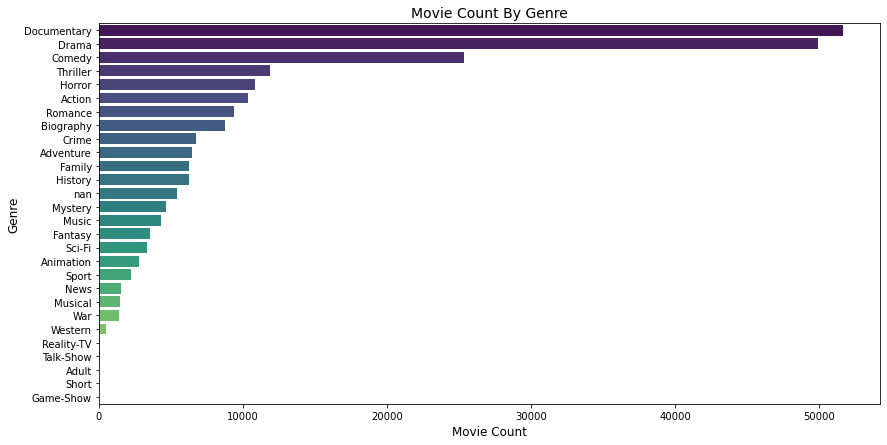

In [40]:
plt.figure(figsize=(14,7))
ax3 = sns.barplot(x=movie_genres['Movie Count'], y=movie_genres['Genre'], palette='viridis')
plt.xlabel('Movie Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.title('Movie Count By Genre', fontsize=14);

In [3]:
imdb_basics = pd.read_csv('./data/imdb.title.basics.csv.gz')
imdb_basics

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***